<h1 style="color:#fce444;font-size:45px;font-family:Georgia;text-align:center;"><strong>🔌Energía de Electrodométicos🔋 <strong style="color:black;font-size:40px;font-family:Georgia;"> <strong style="color:#fce444;font-size:40px;font-family:Georgia;">Proyecto de Aprendizaje de maquinas simulado</strong></strong></strong></h1>
    


#  📊 Actividad de ML ejemplo de regresión

###  📜 Descripción del problema:

En este trabajo, se cuenta con un conjunto de datos que registra el consumo de energía de los electrodomésticos en una vivienda durante aproximadamente 4.5 meses. Este registro incluye variables como la temperatura y la humedad en diferentes áreas de la casa, la temperatura y la humedad externas, la presión atmosférica, la velocidad del viento, la visibilidad y el punto de rocío, todos recolectados de una estación meteorológica cercana. También se incluyen dos variables aleatorias que el autor original del conjunto de datos incluyó para probar modelos de regresión y filtrar atributos no predictivos.

### 📍Objetivo del proyecto:

El objetivo de este proyecto es construir un modelo de aprendizaje automático que pueda predecir el consumo de energía de los electrodomésticos en la vivienda basándose en las características ambientales disponibles en el conjunto de datos. Este modelo puede ser de gran utilidad para entender cómo diferentes factores, tanto internos como externos, pueden influir en el consumo de energía de los electrodomésticos. A largo plazo, este conocimiento podría utilizarse para desarrollar estrategias de ahorro de energía o para diseñar sistemas de automatización del hogar más eficientes en términos de energía.

Para lograr este objetivo, se llevarán a cabo los siguientes pasos:

1. **Inspeccionar y mejorar la calidad de los datos:** Esto implica entender la estructura y las características de los datos, lidiar con los valores faltantes o erróneos, y posiblemente transformar los datos para hacerlos más adecuados para los algoritmos de aprendizaje automático.

2. **Diseñar y llevar a cabo experimentos para ajustar los parámetros del modelo:** Esto conlleva seleccionar un algoritmo de aprendizaje automático (o varios) para el modelo, y luego experimentar con diferentes configuraciones de parámetros para encontrar la que ofrece el mejor rendimiento.

3. **Evaluar y comparar el rendimiento de los modelos implementados:** Finalmente, una vez que se haya entrenado los modelos, procedemos a evaluar su rendimiento utilizando métricas apropiadas y posiblemente comparar diferentes modelos para ver cuál funciona mejor.


###  🧾 Descripción de las variables:
- **T1**:
Temperatura en la zona de la cocina, en grados Celsius

- **RH_1**:
Humedad en la zona de la cocina, en %.

- **T2**:
Temperatura en la zona del salón, en grados Celsius

- **RH_2**:
Humedad en la zona del salón, en %.

- **T3**:
Temperatura en la zona del lavadero

- **RH_3**:
Humedad en la zona del lavadero, en %.

- **T4**:
Humedad en la oficina, en %.

- **RH_4**:
Humedad en la oficina, en %.

- **T5**:
Temperatura en el cuarto de baño, en grados Celsius

- **T6**:
Temperatura en el exterior del edificio (lado norte), en grados Celsius

- **RH_6**:
Humedad en el exterior del edificio (lado norte), en %.

- **T7**:
Temperatura en el cuarto de plancha, en grados Celsius

- **RH_7**:
Humedad en el cuarto de planchado, en %.

- **T8**:
Temperatura en la habitación del adolescente 2, en grados Celsius

- **RH_8**:
Humedad en la habitación de los adolescentes 2, en %.

- **T9**:
Temperatura en la habitación de los padres, en grados Celsius

- **RH_9**:
Humedad en la habitación de los padres, en %.

- **To**:
Temperatura exterior (de la estación meteorológica de Chievres), en Celsius

- **Pressure**:
Presión de la estación meteorológica de Chievres, en mm Hg

- **RH_out**:
Humedad exterior (de la estación meteorológica de Chievres), en %.

- **Wind speed**:
Velocidad del viento de la estación meteorológica de Chievres, en m/s

- **Visibility**:
Visibilidad de la estación meteorológica de Chievres, en km

- **Tdewpoint**:
De la estación meteorológica de Chievres, en Â°C

- **rv1**:
Variable aleatoria 1, adimensional

- **rv2**:
Variable aleatoria 2, no dimensional


### 📦 Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

#LSTM
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

2023-05-31 23:33:44.310555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 📃 Leyendo el conjunto de datos

In [2]:
for dirname, _, filenames in os.walk('files'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

files/energydata_complete.csv


In [3]:
df = pd.read_csv('files/energydata_complete.csv')
df

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

In [4]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [5]:
df.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

## 🔭 Exploración de los datos
En esta sección, trabajamos la exploración de los datos para conocer los atributos, tipos de datos, entre otras características de nuestro dataset.

In [6]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [7]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
df.shape

(19735, 29)

In [9]:
df.size

572315

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [11]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

Validamos si existen valores nulos en nuestro conjunto de datos

In [12]:
df.isnull().sum().sort_values(ascending = True)


date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

Como se puede ver, nuestro conjunto de datos no tiene valores nulos

**Dividimos las columnas en función del tipo para una gestión clara de las columnas**

In [13]:
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

**Separamos las variables dependientes e independientes**

In [14]:
feature_vars = df[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = df[col_target]

In [15]:
feature_vars.describe()

T1            T2            T3            T4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9          RH_1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.910939     20.267106     22.029107     19.485828     40.259739   
std        6.090347      2.109993      1.956162      2.014712      3.979299   
min       -6.065000     15.390000     16.306667     14.890000     27.023333   
25%        3.626667     18.700000     20.790000     18.000000     37.333333   
50%        7.300000     20.033333     22.100000     19.390000     39.656667   
75%       11.256000     21.600000     23.390000     20.600000     43.066667   
max       28.290000     26.000000     27.230000     24.500000     63.360000   

       ...          RH_9         T_out     Tdewpoint        RH_out  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     41.552401      7.411665      3.760707     79.750418   
std    ...      4.151497      5.317409      4.194648     14.901088   
min    ...     29.166667     -5.000000     -6.600000     24.000000   
25%    ...     38.500000      3.666667      0.900000     70.333333   
50%    ...     40.900000      6.916667      3.433333     83.666667   
75%    ...     44.338095     10.408333      6.566667     91.666667   
max    ...     53.326667     26.100000     15.500000    100.000000   

        Press_mm_hg     Windspeed    Visibility        lights           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean     755.522602      4.039752     38.330834      3.801875     24.988033   
std        7.399441      2.451221     11.794719      7.935988     14.496634   
min      729.300000      0.000000      1.000000      0.000000      0.005322   
25%      750.933333      2.000000     29.000000      0.000000     12.497889   
50%      756.100000      3.666667     40.000000      0.000000     24.897653   
75%      760.933333      5.500000     40.000000      0.000000     37.583769   
max      772.300000     14.000000     66.000000     70.000000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 27 columns]

Verificamos la distribución de valores en la columna de lights

In [16]:
target_vars.describe()

Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

In [17]:
feature_vars.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

### Inferencias
1. **Columnas de temperatura:** la temperatura en el interior de la vivienda varía entre 14,89 y 29,85 grados, mientras que en el exterior (T6) oscila entre -6,06 y 28,29 grados. La razón de esta variación es que los sensores se mantienen fuera de la casa.

2. **Columnas de humedad:** la humedad en el interior de la casa varía entre el 20,60% y el 63,36%, excepto en RH_5 (baño) y RH_6 (exterior de la casa), que varían entre el 29,82% y el 96,32% y entre el 1% y el 99,9%, respectivamente.

3. **Electrodomésticos:** El 75% del consumo de los electrodomésticos es inferior a 100 Wh . Con un consumo máximo de 1080 Wh, habrá valores atípicos en esta columna y un pequeño número de casos en los que el consumo es muy elevado.

4. **Columna de luces** - Inicialmente creía que la columna de luces podría dar información útil. Con 11438 entradas 0 (cero) en 14801 filas, esta columna no añadirá ningún valor al modelo. Yo creía que el consumo de luz junto con el nivel de humedad en una habitación daría una idea de la presencia humana en la habitación y por lo tanto su impacto en el consumo del aparato. Por lo tanto, por ahora, dejaré de lado esta columna.

#  🤓 Visualización de Datos

In [18]:
df['date'] = pd.to_datetime(df['date'])

fig = px.line(df, x='date', y='Appliances', title='Appliance energy consumption measurement')
fig.update_layout(xaxis_title='Date', yaxis_title='Energy Consumption (Wh)')

fig.show()


array([[<AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'T2'}>,
        <AxesSubplot:title={'center':'T3'}>,
        <AxesSubplot:title={'center':'T4'}>,
        <AxesSubplot:title={'center':'T5'}>],
       [<AxesSubplot:title={'center':'T6'}>,
        <AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'T9'}>,
        <AxesSubplot:title={'center':'RH_1'}>],
       [<AxesSubplot:title={'center':'RH_2'}>,
        <AxesSubplot:title={'center':'RH_3'}>,
        <AxesSubplot:title={'center':'RH_4'}>,
        <AxesSubplot:title={'center':'RH_5'}>,
        <AxesSubplot:title={'center':'RH_6'}>],
       [<AxesSubplot:title={'center':'RH_7'}>,
        <AxesSubplot:title={'center':'RH_8'}>,
        <AxesSubplot:title={'center':'RH_9'}>,
        <AxesSubplot:title={'center':'T_out'}>,
        <AxesSubplot:title={'center':'Tdewpoint'}>],
       [<AxesSubplot:title={'center':'RH_out'}>,
        <AxesSubplo

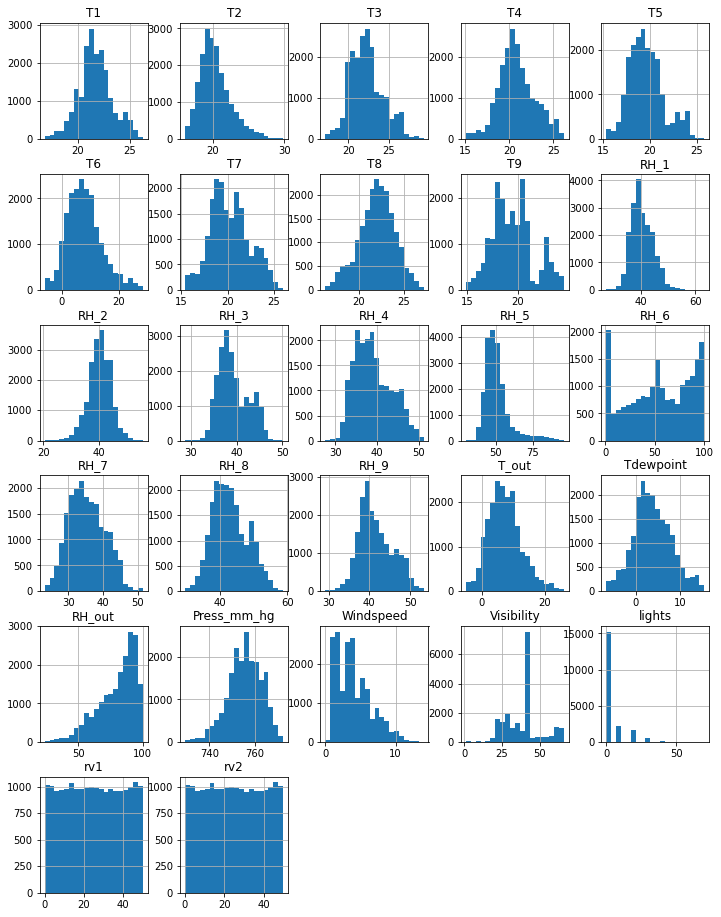

In [19]:
feature_vars.hist(bins = 20 , figsize= (12,16))

Nos centramos en los displots de RH_6, RH_out, Visibility, Windspeed debido a que tienen una distribución irregular

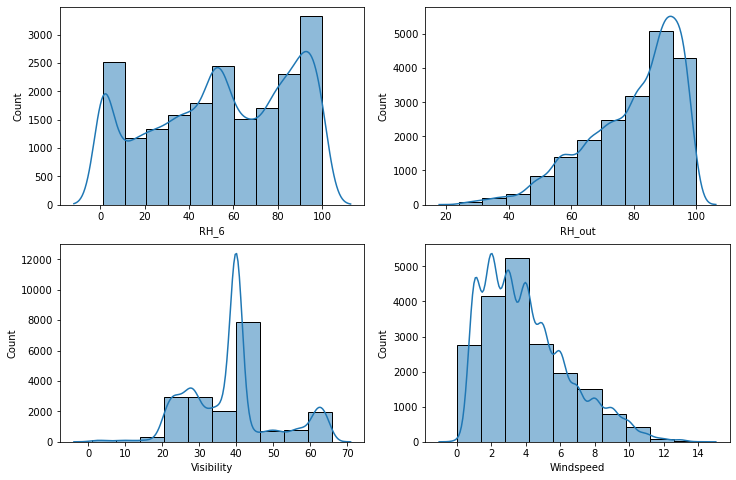

In [20]:
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.histplot(feature_vars["RH_6"],bins=10, ax= ax[0][0], kde=True, kde_kws={"cut": 3})
vis2 = sns.histplot(feature_vars["RH_out"],bins=10, ax=ax[0][1], kde=True, kde_kws={"cut": 3})
vis3 = sns.histplot(feature_vars["Visibility"],bins=10, ax=ax[1][0], kde=True, kde_kws={"cut": 3})
vis4 = sns.histplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1], kde=True, kde_kws={"cut": 3})

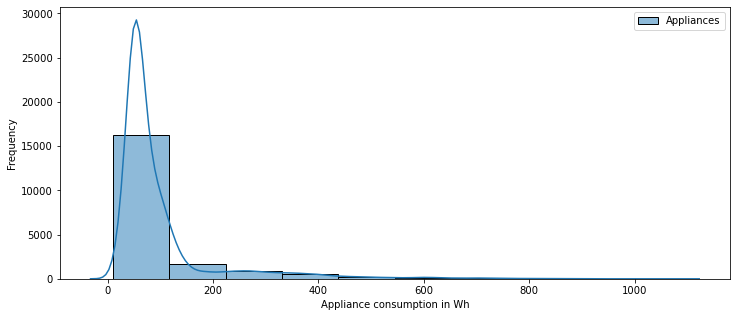

In [21]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.histplot(target_vars , bins=10, kde=True, kde_kws={"cut": 3} ) ;

**Mapa de calor para mostrar la correlación de características**

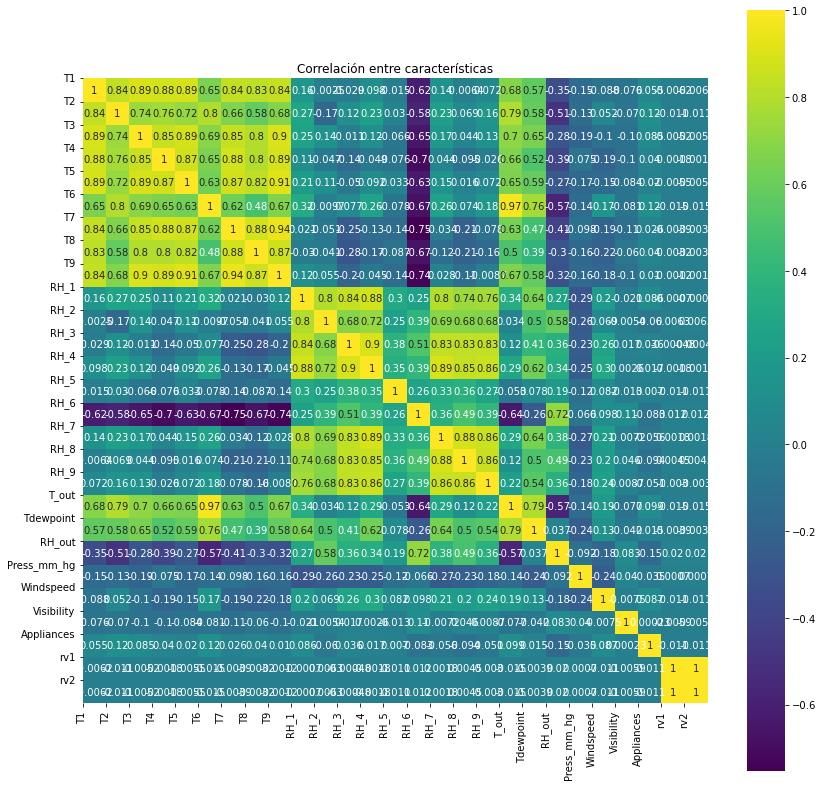

In [22]:
# Utilizamos la columna de weather , temperature , applainces y random  para ver la correlación
corr_df = df[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = corr_df.corr()
# Ocultar los valores repetidos
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(14, 14))
#Generamos el mapa de calor
sns.heatmap(corr, annot=True, square=True, cmap='viridis', vmax=1)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlación entre características")
    #show plot
plt.show()


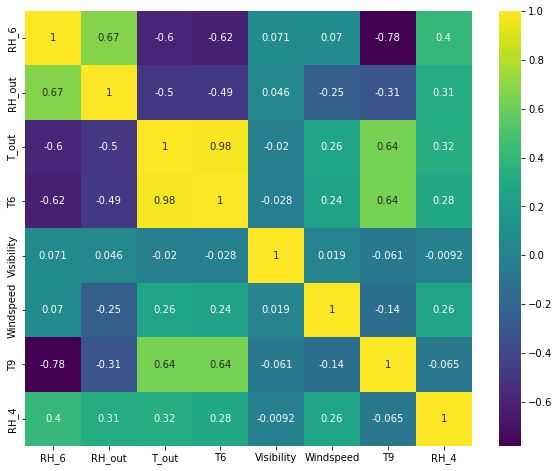

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df[['RH_6', 'RH_out','T_out','T6','Visibility', 'Windspeed', 'T9','RH_4']].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show() 

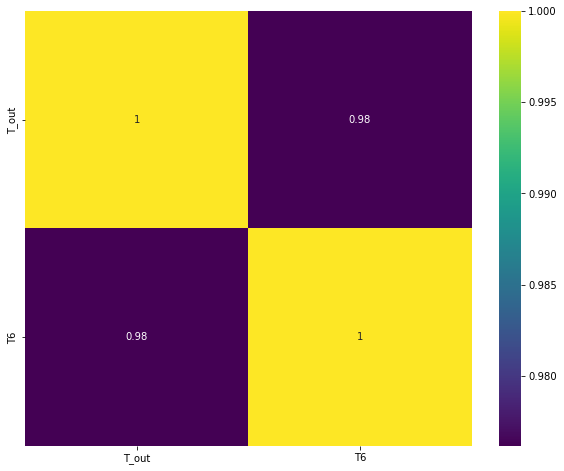

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df[['T_out','T6']].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show() 

In [25]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(corr_df, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974787
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
RH_7  RH_9     0.858686
RH_4  RH_9     0.856591
RH_8  RH_9     0.855812
T3    T4       0.852778
      T7       0.847374
RH_4  RH_8     0.847259
T1    T9       0.844777
RH_1  RH_3     0.844677
T1    T7       0.838705
      T2       0.836834
RH_3  RH_9     0.833538
      RH_7     0.832685
      RH_8     0.828822
T1    T8       0.825413
T5    T8       0.824981
T2    T6       0.801186
RH_1  RH_7     0.801122
      RH_2     0.797535
T4    T8       0.796256
T3    T8       0.795283
T2    T_out    0.792255
dtype: float64

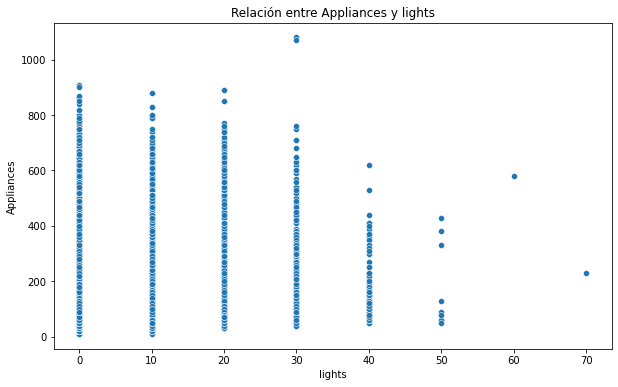

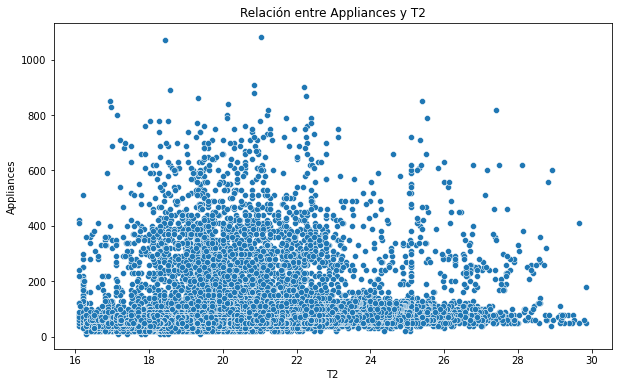

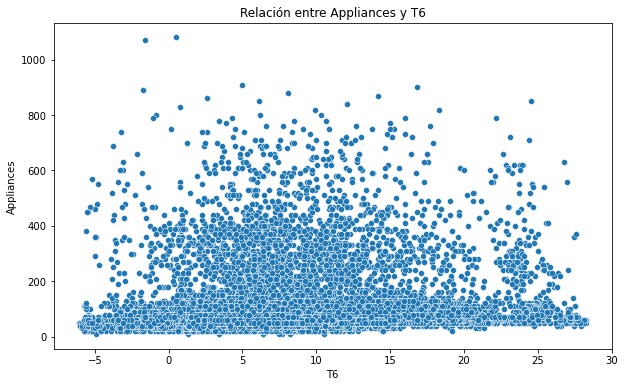

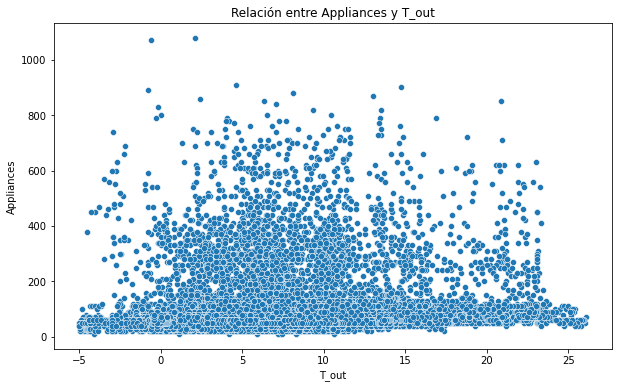

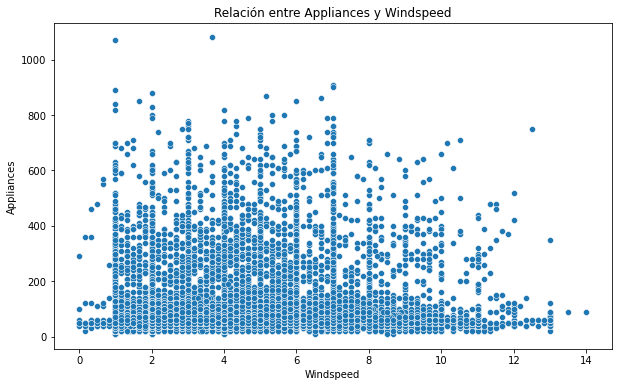

In [26]:
corr_with_target = df.corr()['Appliances'].sort_values(ascending=False)

# Tomamos las 5 variables más correlacionadas, sin contar 'Appliances'
top_corr_with_appliances = corr_with_target[1:6].index.tolist()

# Luego utilizamos el código que te proporcioné anteriormente para crear los gráficos de dispersión
for var in top_corr_with_appliances:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='Appliances')
    plt.title(f'Relación entre Appliances y {var}')
    plt.show()


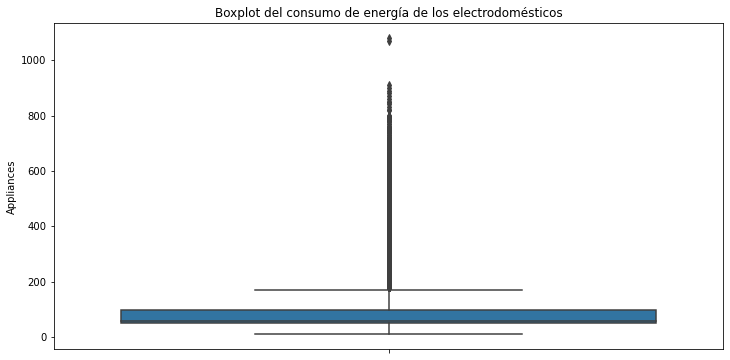

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Appliances')
plt.title('Boxplot del consumo de energía de los electrodomésticos')
plt.show()

In [28]:
fig = px.line(df, x='date', y='T1', title='Temperatura en la zona de la cocina a lo largo del tiempo')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Temperatura (Celsius)')
fig.show()

### Inferencias
1. **Temperatura:** Todas las columnas/variables de temperatura muestran una distribución normal a excepción de la T9. En el mapa de calor, observamos que todas las temperaturas desde la T1 hasta T9 y T_out tienen valores positivos de correlación con la variable objetivo "Aplliances". Para las temperaturas interiores, las correlaciones son altas, como era de esperar, ya que la ventilación es impulsada por la unidad HRV y minimiza las diferencias de temperatura del aire entre las habitaciones. Cuatro columnas tienen un alto grado de correlación con T9-73,T5,T7,T8 también T6 y T_out tiene una alta correlación (ambas temperaturas del exterior). Por lo tanto, T6 y T9 pueden eliminarse del conjunto de train a futuro, ya que la información que proporcionan puede obtenerse en otros campos.

2. **Columnas de humedad:** Todas las columnas siguen una distribución normal a diferencia de RH_6 y RH_out, debido a que esos sensores están fuera de la casa. El mapa de calor, nos muestra también que no hay casos de correlación significativamente alta (> 0,9) para los sensores de humedad.

3. **Electrodomésticos:** Esta columna está sesgada positivamente, la mayoría de los valores están alrededor de la media 100 Wh. Aunque hay valores atípicos en esta columna.

4. **Columna de luces:** Las columnas de visibility están negativamente sesgadas
5. **Velocidad del viento:** La columna está positivamente sesgada
6. **Variables random:** Estas variables rv1 y rv2 no tienen ningún papel

#  🛠️ Preprocesamiento de Datos

Para tener una mejor comprensión de los datos, se ha renombrado las columnas usando un diccionario que asigna los nuevos nombres a las columnas existentes.

In [29]:
## diccionario de columnas para renombrar
rename_dict = {
    'Appliances': 'Appliances_energy',
    'lights': 'lights_energy',
    'T1': 'T_kitchen',
    'RH_1': 'RH_kitchen',
    'T2': 'T_livingroom',
    'RH_2': 'RH_livingroom',
    'T3': 'T_laundryroom',
    'RH_3': 'RH_laundryroom',
    'T4': 'T_officeroom',
    'RH_4': 'RH_officeroom',
    'T5': 'T_bathroom',
    'RH_5': 'RH_bathroom',
    'T6': 'T_OutsideBuliding',
    'RH_6': 'RH_OutsideBuilding',
    'T7': 'T_ironingroom',
    'RH_7': 'RH_ironingroom',
    'T8': 'T_teenagerroom2',
    'RH_8': 'RH_teenagerroom2',
    'T9': 'T_parentsroom',
    'RH_9': 'RH_parentsroom',
}

df.rename(columns=rename_dict, inplace=True)

In [30]:
col_temp = [rename_dict.get(col, col) for col in col_temp]
col_hum = [rename_dict.get(col, col) for col in col_hum]
col_light = [rename_dict.get(col, col) for col in col_light]
col_target = [rename_dict.get(col, col) for col in col_target]

# No necesitamos actualizar col_weather, col_light, y col_randoms, ya que esos nombres de columnas no cambiaron
# Ahora puedes usar las listas de características actualizadas para seleccionar las columnas en tus conjuntos de datos
feature_vars = df[col_temp + col_hum + col_weather + col_randoms ]
target_vars = df[col_target]

In [31]:
df.columns

Index(['date', 'Appliances_energy', 'lights_energy', 'T_kitchen', 'RH_kitchen',
       'T_livingroom', 'RH_livingroom', 'T_laundryroom', 'RH_laundryroom',
       'T_officeroom', 'RH_officeroom', 'T_bathroom', 'RH_bathroom',
       'T_OutsideBuliding', 'RH_OutsideBuilding', 'T_ironingroom',
       'RH_ironingroom', 'T_teenagerroom2', 'RH_teenagerroom2',
       'T_parentsroom', 'RH_parentsroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Verificamos el tipo de dato de date

In [32]:
df['date'].dtype

dtype('<M8[ns]')

Conversión de la columna 'date' a tipo de datos datetime, lo que facilitará el trabajo con fechas y tiempos en análisis posteriores.

In [33]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

In [34]:
df.dtypes

date                  datetime64[ns]
Appliances_energy              int64
lights_energy                  int64
T_kitchen                    float64
RH_kitchen                   float64
T_livingroom                 float64
RH_livingroom                float64
T_laundryroom                float64
RH_laundryroom               float64
T_officeroom                 float64
RH_officeroom                float64
T_bathroom                   float64
RH_bathroom                  float64
T_OutsideBuliding            float64
RH_OutsideBuilding           float64
T_ironingroom                float64
RH_ironingroom               float64
T_teenagerroom2              float64
RH_teenagerroom2             float64
T_parentsroom                float64
RH_parentsroom               float64
T_out                        float64
Press_mm_hg                  float64
RH_out                       float64
Windspeed                    float64
Visibility                   float64
Tdewpoint                    float64
r

Se eliminan algunas columnas que se consideran innecesarias para el modelo.

In [35]:
columns_to_delete = ["rv1","rv2","Visibility","date","T_OutsideBuliding", "lights_energy", "RH_OutsideBuilding"]
df.drop(columns_to_delete,axis=1 , inplace=True)
features_columns = [col for col in df.columns if col not in ['Appliances_energy']]

In [36]:
df.columns

Index(['Appliances_energy', 'T_kitchen', 'RH_kitchen', 'T_livingroom',
       'RH_livingroom', 'T_laundryroom', 'RH_laundryroom', 'T_officeroom',
       'RH_officeroom', 'T_bathroom', 'RH_bathroom', 'T_ironingroom',
       'RH_ironingroom', 'T_teenagerroom2', 'RH_teenagerroom2',
       'T_parentsroom', 'RH_parentsroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Tdewpoint', 'hour', 'day_of_week'],
      dtype='object')

Se aplica la transformación logarítmica a la columna objetivo en el conjunto de pruebas. Esta es una técnica común para manejar los datos sesgados en el análisis de regresión.

In [37]:
df[target_vars.columns] = np.log1p(df[target_vars.columns])
df[target_vars.columns]

Appliances_energy
0               4.110874
1               4.110874
2               3.931826
3               3.931826
4               4.110874
...                  ...
19730           4.615121
19731           4.510860
19732           5.602119
19733           6.042633
19734           6.066108

[19735 rows x 1 columns]

In [38]:
df_transformed = df.copy() 

In [39]:
df_transformed[target_vars.columns] = np.log1p(df_transformed[target_vars.columns])

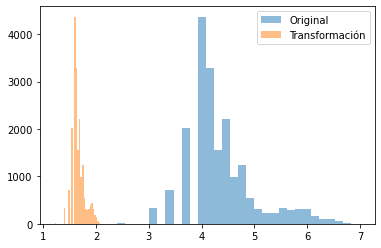

In [40]:
# Comparación de las distribuciones
plt.hist(df[target_vars.columns], bins=30, alpha=0.5, label='Original')
plt.hist(df_transformed[target_vars.columns], bins=30, alpha=0.5, label='Transformación')
plt.legend(loc='upper right')
plt.show() 

<AxesSubplot:>

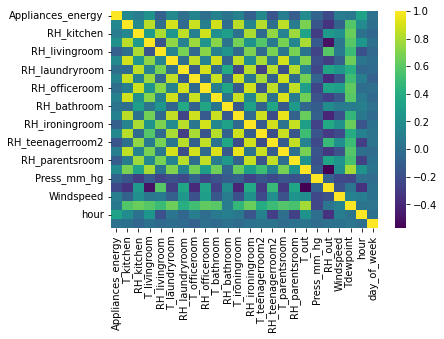

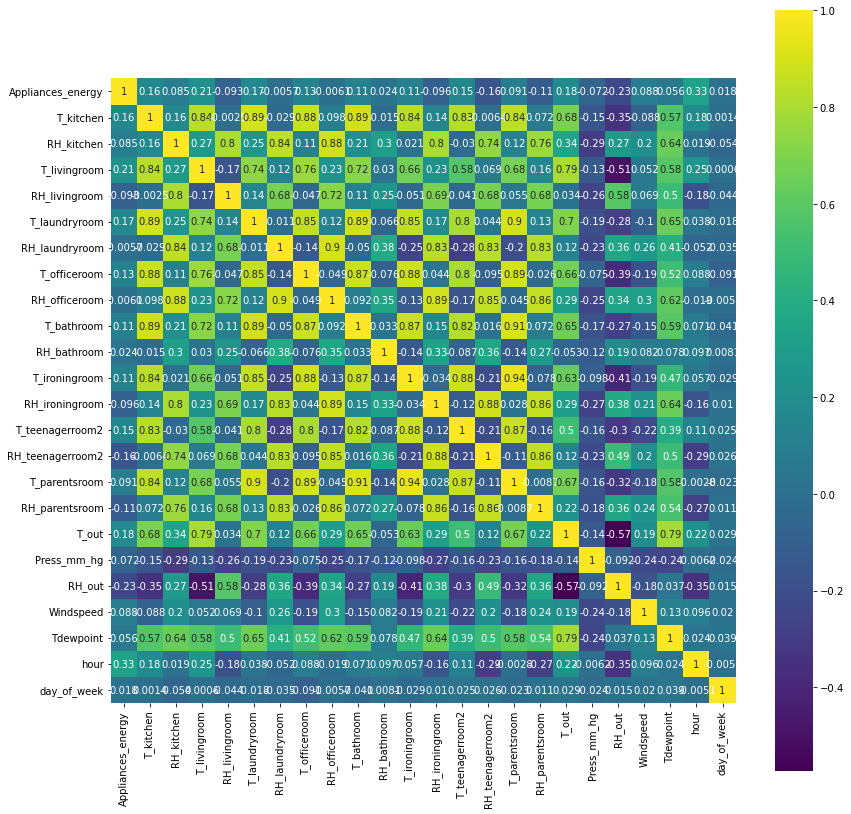

In [41]:
corr = df.corr()
sns.heatmap(corr, cmap='viridis')
correlations = df.corr()[target_vars.columns]

# Selecciona solo las características con una correlación absoluta superior a un cierto umbral
features = correlations[correlations.abs() > 0.1].index
plt.figure(figsize=(14, 14))
df_selected_features = df[features]
# Después de la selección de características
corr = df_selected_features.corr()
sns.heatmap(corr, square=True,annot=True, cmap='viridis')

### 🔖 Selección de características

In [42]:
X_to_select = df[['Appliances_energy'] + features_columns ]
Y_to_select = df[target_vars.columns]

In [43]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Definir todas las columnas de características

# Crear y entrenar el modelo
lasso = Lasso(alpha=0.1)

# Crear el objeto SelectFromModel
sel_ = SelectFromModel(lasso)
sel_.fit(X_to_select, Y_to_select)

# Obtener los nombres de las características seleccionadas
selected_features = X_to_select.columns[sel_.get_support()]

# Obtener los coeficientes del modelo Lasso
lasso_coefs = sel_.estimator_.coef_

In [44]:
# Mostrar la cantidad de características
print('Características totales: {}'.format(len(X_to_select)))
print('Características seleccionadas: {}'.format(len(selected_features)))
print(selected_features)

# Mostrar la cantidad de coeficientes reducidos a cero por Lasso
print('Entidades con coeficientes reducidos a cero: {}'.format(np.sum(lasso_coefs == 0)))

# Mostrar las características que fueron excluidas por Lasso
excluded_feat = set(X_to_select) - set(selected_features)
print('Características excluidas: {}'.format(excluded_feat))

Características totales: 19735
Características seleccionadas: 4
Index(['Appliances_energy', 'Press_mm_hg', 'RH_out', 'hour'], dtype='object')
Entidades con coeficientes reducidos a cero: 20
Características excluidas: {'T_officeroom', 'RH_officeroom', 'T_parentsroom', 'T_livingroom', 'Windspeed', 'T_bathroom', 'RH_ironingroom', 'RH_kitchen', 'T_laundryroom', 'RH_livingroom', 'T_kitchen', 'T_out', 'day_of_week', 'RH_laundryroom', 'T_ironingroom', 'Tdewpoint', 'RH_bathroom', 'T_teenagerroom2', 'RH_parentsroom', 'RH_teenagerroom2'}


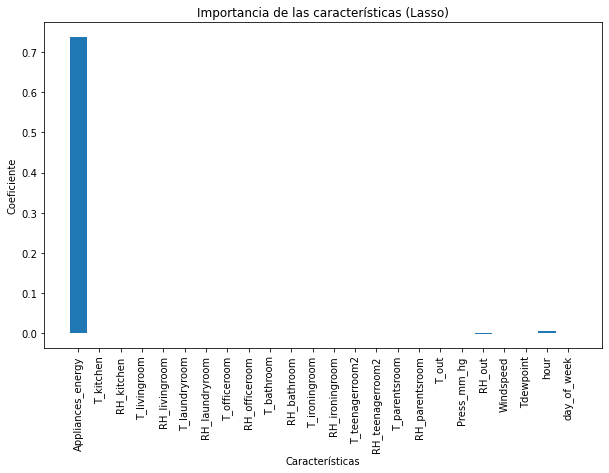

In [45]:
# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(X_to_select.columns, lasso_coefs)
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Coeficiente')
plt.title('Importancia de las características (Lasso)')
plt.show()

###  📊 Escalamiento de datos

Escalamos los datos utilizando MinMaxScaler. Este paso es crucial cuando se trabaja con algoritmos que son sensibles a la escala de las características

In [46]:
from sklearn.preprocessing import RobustScaler
df_scaled = df.copy()

# Creas la instancia del escalador
scaler = RobustScaler()

df_scaled[['Appliances_energy'] + features_columns] = scaler.fit_transform(df[['Appliances_energy'] + features_columns])

In [53]:
df_scaled.head()

Appliances_energy  T_kitchen  RH_kitchen  T_livingroom  RH_livingroom  \
0           0.000000  -0.929348    1.384884     -0.295203       0.800373   
1           0.000000  -0.929348    1.227326     -0.295203       0.787780   
2          -0.262037  -0.929348    1.158721     -0.295203       0.769900   
3          -0.262037  -0.929348    1.118023     -0.295203       0.763060   
4           0.000000  -0.929348    1.164535     -0.295203       0.751866   

   T_laundryroom  RH_laundryroom  T_officeroom  RH_officeroom  T_bathroom  \
0         -0.924        1.275720     -0.648508       1.081489   -0.949273   
1         -0.924        1.288066     -0.648508       1.145749   -0.949273   
2         -0.924        1.317558     -0.677043       1.130282   -0.949273   
3         -0.924        1.331276     -0.691310       1.105131   -0.949273   
4         -0.924        1.331276     -0.691310       1.075956   -0.935041   

   ...  RH_teenagerroom2  T_parentsroom  RH_parentsroom     T_out  \
0  ...          0.873572      -0.906410        0.793067 -0.046972   
1  ...          0.868663      -0.893590        0.798206 -0.064277   
2  ...          0.850812      -0.919231        0.787928 -0.081582   
3  ...          0.832069      -0.919231        0.770799 -0.098888   
4  ...          0.832069      -0.919231        0.770799 -0.116193   

   Press_mm_hg    RH_out  Windspeed  Tdewpoint      hour  day_of_week  
0        -2.26  0.390625   0.952381   0.329412  0.454545        -0.75  
1        -2.25  0.390625   0.857143   0.311765  0.454545        -0.75  
2        -2.24  0.390625   0.761905   0.294118  0.454545        -0.75  
3        -2.23  0.390625   0.666667   0.276471  0.454545        -0.75  
4        -2.22  0.390625   0.571429   0.258824  0.454545        -0.75  

[5 rows x 24 columns]

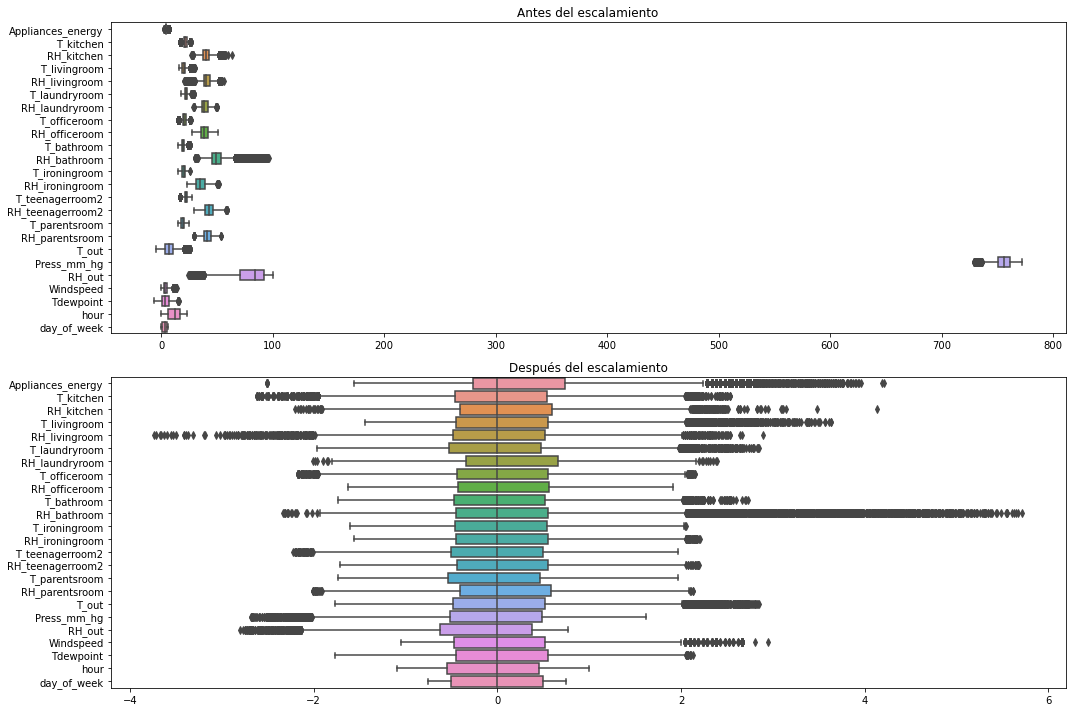

In [57]:
plt.figure(figsize=(15, 10))

# Gráfica antes del escalamiento
plt.subplot(2, 1, 1)
sns.boxplot(data=X_to_select, orient="h")
plt.title('Antes del escalamiento')

# Gráfica después del escalamiento
plt.subplot(2, 1, 2)
sns.boxplot(data=df_scaled, orient="h")
plt.title('Después del escalamiento')

plt.tight_layout()
plt.show()


In [59]:
print("Antes del preprocesamiento:")
print(X_to_select.describe())
print("\nDespués del preprocesamiento:")
print(df_scaled.describe())

Antes del preprocesamiento:
       Appliances_energy     T_kitchen    RH_kitchen  T_livingroom  \
count       19735.000000  19735.000000  19735.000000  19735.000000   
mean            4.319609     21.686571     40.259739     20.341219   
std             0.648770      1.606066      3.979299      2.192974   
min             2.397895     16.790000     27.023333     16.100000   
25%             3.931826     20.760000     37.333333     18.790000   
50%             4.110874     21.600000     39.656667     20.000000   
75%             4.615121     22.600000     43.066667     21.500000   
max             6.985642     26.260000     63.360000     29.856667   

       RH_livingroom  T_laundryroom  RH_laundryroom  T_officeroom  \
count   19735.000000   19735.000000    19735.000000  19735.000000   
mean       40.420420      22.267611       39.242500     20.855335   
std         4.069813       2.006111        3.254576      2.042884   
min        20.463333      17.200000       28.766667     15.100000

# 🤖 Implementación de los Modelos

#### Abrimos el conjunto de datos de entrenamiento y prueba
Para esto, se utilizó la función train_test_split de la librería ya importada de sklearn.model_selection. Utilizamos el 75% del conjunto de datos para entrenamiento y el 25% para prueba tal y como indicado el siguiente script

División de los datos en conjuntos de entrenamiento y prueba, y luego en variables dependientes e independientes. Esto es esencial para la validación del modelo y la evaluación del rendimiento.

In [60]:
#selected_features = selected_features.drop('Appliances_energy')  # Remover la columna 'Appliances_energy'

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_to_select[selected_features],df[target_vars.columns],test_size=0.25,random_state=40)

In [62]:
X_train.describe()

Appliances_energy   Press_mm_hg        RH_out          hour
count       14801.000000  14801.000000  14801.000000  14801.000000
mean            4.319479    755.561311     79.744066     11.477333
std             0.649882      7.398129     14.952250      6.911421
min             2.397895    729.366667     24.500000      0.000000
25%             3.931826    750.983333     70.000000      6.000000
50%             4.110874    756.100000     83.833333     11.000000
75%             4.615121    760.966667     91.666667     17.000000
max             6.985642    772.300000    100.000000     23.000000

In [63]:
X_test.describe()

Appliances_energy  Press_mm_hg       RH_out         hour
count        4934.000000  4934.000000  4934.000000  4934.000000
mean            4.319999   755.406484    79.769473    11.576003
std             0.645489     7.402908    14.748034     6.953627
min             2.397895   729.300000    24.000000     0.000000
25%             3.931826   750.800000    70.500000     5.000000
50%             4.110874   756.100000    83.666667    12.000000
75%             4.615121   760.795833    91.333333    18.000000
max             6.976348   772.250000   100.000000    23.000000

## 🌲 Árboles de decisión

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Ajustar el árbol de decisión simple
dt_simple = DecisionTreeRegressor()

In [65]:
%%time
dt_simple.fit(X_train, y_train)

CPU times: user 35.7 ms, sys: 4.68 ms, total: 40.4 ms
Wall time: 39.4 ms


DecisionTreeRegressor()

In [66]:
# Predecir y calcular el error cuadrático medio
y_pred_simple = dt_simple.predict(X_test)
mse_simple = mean_squared_error(y_test, y_pred_simple)

print("Error cuadrático medio del árbol de decisión simple: ", mse_simple)

Error cuadrático medio del árbol de decisión simple:  1.775821660660401e-07


**Utilizando GridSearchCV**

In [67]:
# Definir los parámetros para la búsqueda en malla
params = {
    #'max_depth': [20, 25, 30],
    'min_samples_split': [2, 10, 20, 30, 40]
}
dtr = DecisionTreeRegressor()
# Ajustar GridSearchCV
grid_search = GridSearchCV(estimator=dtr, param_grid=params, cv=5)

In [68]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 411 ms, sys: 10.3 ms, total: 422 ms
Wall time: 421 ms


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_split': [2, 10, 20, 30, 40]})

In [69]:
print("Mejores parámetros: ", grid_search.best_params_)

Mejores parámetros:  {'min_samples_split': 2}


**Aplicando los mejores parámetros**

In [70]:
# Ajustar el árbol de decisión con los mejores parámetros
dt_best = DecisionTreeRegressor(
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                random_state=42)
dt_best.fit(X_train, y_train)

# Predecir y calcular el error cuadrático medio
y_pred_best = dt_best.predict(X_test)
mse_best_dt = mean_squared_error(y_test, y_pred_best)

print("Error cuadrático medio del árbol de decisión con los mejores parámetros: ", mse_best_dt)

Error cuadrático medio del árbol de decisión con los mejores parámetros:  4.0892280673385325e-07


**Antes y después de GridSearchCV**

In [71]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Árbol de decisión simple
mae_simple_dt = mean_absolute_error(y_test, y_pred_simple)
mse_simple_dt = mean_squared_error(y_test, y_pred_simple)
r2_simple_dt = r2_score(y_test, y_pred_simple)

print("Árbol de Decisión Simple:")
print("Error Absoluto Medio (MAE): ", mae_simple_dt)
print("Error Cuadrático Medio (MSE): ", mse_simple_dt)
print("Coeficiente de determinación R2: ", r2_simple_dt)

mae_best_dt = mean_absolute_error(y_test, y_pred_best)
r2_best_dt = r2_score(y_test, y_pred_best)
print("\nÁrbol de Decisión con los Mejores Parámetros:")
print("Error Absoluto Medio (MAE): ", mae_best_dt)
print("Error Cuadrático Medio (MSE): ", mse_best_dt)
print("Coeficiente de determinación R2: ", r2_best_dt)


Árbol de Decisión Simple:
Error Absoluto Medio (MAE):  1.4597163897584075e-05
Error Cuadrático Medio (MSE):  1.775821660660401e-07
Coeficiente de determinación R2:  0.9999995737051213

Árbol de Decisión con los Mejores Parámetros:
Error Absoluto Medio (MAE):  2.233296725665361e-05
Error Cuadrático Medio (MSE):  4.0892280673385325e-07
Coeficiente de determinación R2:  0.9999990183603332


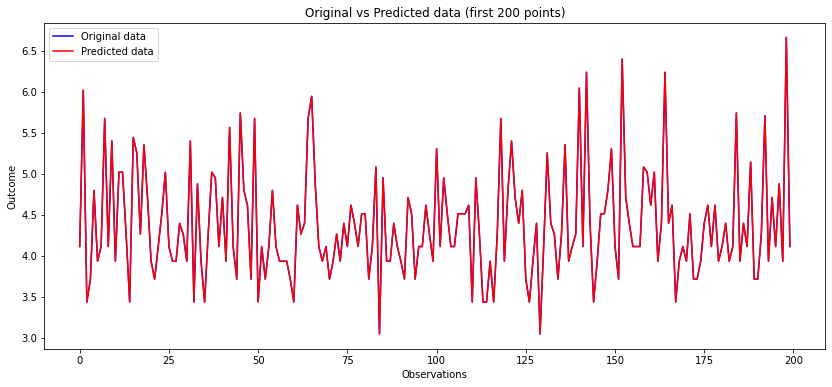

In [72]:
# Define el número de datos que deseas visualizar
N = 200

# Hacer predicciones en el conjunto de prueba
y_pred = dt_best.predict(X_test)

# Crear una figura
plt.figure(figsize=(14, 6))

# Trazar los datos de prueba originales
plt.plot(y_test.values[:N], label='Original data', color='blue')

# Trazar las predicciones
plt.plot(y_pred_best[:N], label='Predicted data', color='red')

# Añadir una leyenda
plt.legend()

# Añadir títulos y etiquetas
plt.title('Original vs Predicted data (first {} points)'.format(N))
plt.xlabel('Observations')
plt.ylabel('Outcome')

# Mostrar la gráfica
plt.show()



##  🍃 RandomForest

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_default = RandomForestRegressor()

In [74]:
%%time
rf_default.fit(X_train, y_train.values.ravel())

CPU times: user 946 ms, sys: 10.2 ms, total: 956 ms
Wall time: 959 ms


RandomForestRegressor()

In [75]:
pred_rf_default = rf_default.predict(X_test)

In [76]:
mse_rf_default = mean_squared_error(y_test, pred_rf_default)

print("Error cuadrático medio del Random Forest simple: ", mse_rf_default)

Error cuadrático medio del Random Forest simple:  1.4297004085184128e-06


**Utilizando GridSearch**

In [77]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [15, 25, 35, 45],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [78]:
%%time
grid_search_rf.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 48 candidates, totalling 144 fits
CPU times: user 2.37 s, sys: 393 ms, total: 2.76 s
Wall time: 1min 7s


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 25, 35, 45],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [79]:
print("Mejores parámetros: ", grid_search_rf.best_params_)

Mejores parámetros:  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


**Aplicando los mejores parámetros**

In [80]:
best_grid_rf = grid_search_rf.best_estimator_

pred_rf_best = best_grid_rf.predict(X_test)

mse_best_rf = mean_squared_error(y_test, pred_rf_best)

print("Error cuadrático medio del Random Forest con los mejores parámetros: ", mse_best_rf)

Error cuadrático medio del Random Forest con los mejores parámetros:  2.056002511117616e-06


**Antes y después de GridSearchCV**

In [81]:
# Para el modelo Random Forest por defecto
mae_simple_rf = mean_absolute_error(y_test, pred_rf_default)
mse_simple_rf = mean_squared_error(y_test, pred_rf_default)
r2_simple_rf = r2_score(y_test, pred_rf_default)
# Para el modelo Random Forest con los mejores parámetros

mae_best_rf = mean_absolute_error(y_test, pred_rf_best)
r2_best_rf = r2_score(y_test, pred_rf_best)

print("Para el modelo Random Forest por defecto:")
print("Error cuadrático medio (MSE): ", mse_simple_rf)
print("Error absoluto medio (MAE): ", mae_simple_rf)
print("Coeficiente de determinación R2: ", r2_simple_rf)

print("\nPara el modelo Random Forest con los mejores parámetros:")
print("Error cuadrático medio (MSE): ", mse_best_rf)
print("Error absoluto medio (MAE): ", mae_best_rf)
print("Coeficiente de determinación R2: ", r2_best_rf)

Para el modelo Random Forest por defecto:
Error cuadrático medio (MSE):  1.4297004085184128e-06
Error absoluto medio (MAE):  4.640749147232139e-05
Coeficiente de determinación R2:  0.9999965679326036

Para el modelo Random Forest con los mejores parámetros:
Error cuadrático medio (MSE):  2.056002511117616e-06
Error absoluto medio (MAE):  6.0179048715513246e-05
Coeficiente de determinación R2:  0.9999950644630557


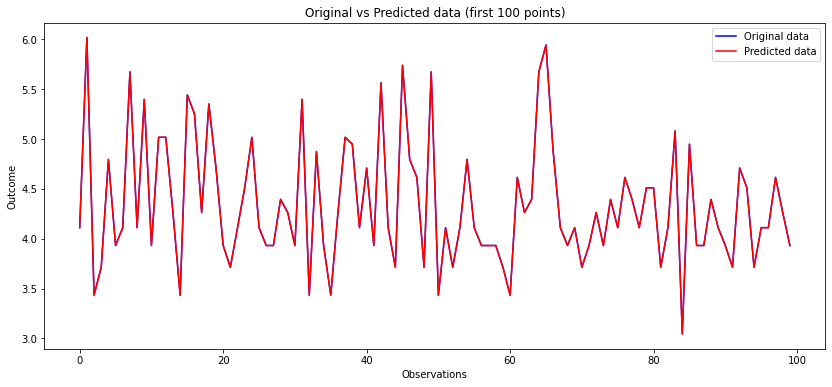

In [82]:
# Define el número de datos que deseas visualizar
N = 100


# Crear una figura
plt.figure(figsize=(14, 6))

# Trazar los datos de prueba originales
plt.plot(y_test.values[:N], label='Original data', color='blue')

# Trazar las predicciones
plt.plot(pred_rf_best[:N], label='Predicted data', color='red')

# Añadir una leyenda
plt.legend()

# Añadir títulos y etiquetas
plt.title('Original vs Predicted data (first {} points)'.format(N))
plt.xlabel('Observations')
plt.ylabel('Outcome')

# Mostrar la gráfica
plt.show()

## 🤖🧠 MLPRegressor

In [83]:
from sklearn.neural_network import MLPRegressor

In [84]:
# Crear el modelo
mlp_simple = MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam",alpha=0.01,
                   learning_rate='constant', learning_rate_init=0.01, max_iter=500, tol=0.0001, random_state=42)

In [85]:
%%time
# Ajustar el modelo
mlp_simple.fit(X_train, y_train.values.ravel())

CPU times: user 9.69 s, sys: 2.29 s, total: 12 s
Wall time: 2.12 s


MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.01,
             max_iter=500, random_state=42)

In [86]:
# Hacer predicciones
y_pred_mlp_simple = mlp_simple.predict(X_test)

In [87]:
# Calcular el error cuadrático medio
mse_mlp = mean_squared_error(y_test, y_pred_mlp_simple)

print("Error cuadrático medio: ", mse_mlp)

Error cuadrático medio:  0.0007606054039960029


📇 **Utilizando GridSearchCV**

In [88]:
# Definir los parámetros para la búsqueda en malla
parameters = {
    'hidden_layer_sizes': (100, 200),
    'alpha': [0.01, 0.1]
}

In [89]:
# Crear una nueva instancia del MLPRegressor
mlp = MLPRegressor(max_iter=1000)

In [90]:
# Crear el objeto GridSearchCV
clf = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error', cv=5)

In [91]:
%%time
# Ajustar GridSearchCV con los datos de entrenamiento
clf.fit(X_train, y_train.values.ravel())

CPU times: user 2min 23s, sys: 34.6 s, total: 2min 57s
Wall time: 29.5 s


GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=1000),
             param_grid={'alpha': [0.01, 0.1],
                         'hidden_layer_sizes': (100, 200)},
             scoring='neg_mean_squared_error')

In [92]:
# Ver los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros: ", clf.best_params_)

Mejores parámetros:  {'alpha': 0.1, 'hidden_layer_sizes': 100}


In [93]:
# Mejor modelo encontrado por GridSearchCV
best_mlp_model = clf.best_estimator_

**Aplicando los mejores parámetros**

In [94]:
%%time
# Entrenar el mejor modelo con todos los datos de entrenamiento

best_mlp_model.fit(X_train, y_train.values.ravel())

CPU times: user 7.98 s, sys: 2.11 s, total: 10.1 s
Wall time: 1.75 s


MLPRegressor(alpha=0.1, hidden_layer_sizes=100, max_iter=1000)

In [95]:
# Predecir con los datos de prueba
y_pred_mlp_best = best_mlp_model.predict(X_test)

**Antes y después de GridSearchCV**

In [96]:
from math import sqrt

# MLP simple
mae_simple_mlp = mean_absolute_error(y_test, y_pred_mlp_simple)
mse_simple_mlp = mean_squared_error(y_test, y_pred_mlp_simple)
r2_simple_mlp = r2_score(y_test, y_pred_mlp_simple)
print("MLPRegressor Simple:")
print("Error Absoluto Medio (MAE): ", mae_simple_mlp)
print("Error Cuadrático Medio (MSE): ", mse_simple_mlp)
print("Coeficiente de determinación R2: ", r2_simple_mlp)

# MLP con los mejores parámetros
mae_best_mlp = mean_absolute_error(y_test, y_pred_mlp_best)
mse_best_mlp = mean_squared_error(y_test, y_pred_mlp_best)
r2_best_mlp = r2_score(y_test, y_pred_mlp_best)
print("\nMLPRegressor con los Mejores Parámetros:")
print("Error Absoluto Medio (MAE): ",mae_best_mlp )
print("Error Cuadrático Medio (MSE): ",mse_best_mlp )
print("Coeficiente de determinación R2: ", r2_best_mlp)

MLPRegressor Simple:
Error Absoluto Medio (MAE):  0.020752046643476345
Error Cuadrático Medio (MSE):  0.0007606054039960029
Coeficiente de determinación R2:  0.998174128654473

MLPRegressor con los Mejores Parámetros:
Error Absoluto Medio (MAE):  0.00473524222165514
Error Cuadrático Medio (MSE):  3.1496570266355925e-05
Coeficiente de determinación R2:  0.9999243909064679


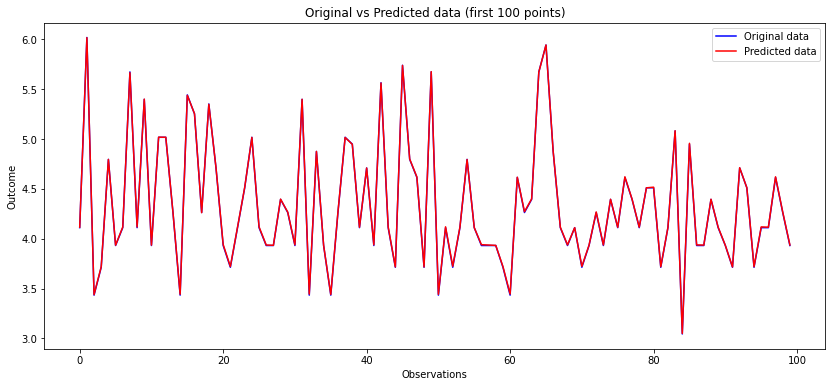

In [97]:
# Define el número de datos que deseas visualizar
N = 100

# Crear una figura
plt.figure(figsize=(14, 6))

# Trazar los datos de prueba originales
plt.plot(y_test.values[:N], label='Original data', color='blue')

# Trazar las predicciones
plt.plot(y_pred_mlp_best[:N], label='Predicted data', color='red')

# Añadir una leyenda
plt.legend()

# Añadir títulos y etiquetas
plt.title('Original vs Predicted data (first {} points)'.format(N))
plt.xlabel('Observations')
plt.ylabel('Outcome')

# Mostrar la gráfica
plt.show()

### 🤖🧠 LSTM

In [98]:
# Obtener las dimensiones de los datos
n_timesteps, n_features = X_train.shape[0], X_train.shape[1]

In [99]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Obtener las dimensiones de los datos
n_samples, n_timesteps = X_train.shape

# Definir el modelo LSTM
model_LSTM = Sequential()
model_LSTM.add(LSTM(40, return_sequences=True, input_shape=(n_timesteps, 1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(20, return_sequences=True))
model_LSTM.add(Dropout(0.3))
model_LSTM.add(LSTM(20, return_sequences=False))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1))

# Compilar el modelo
model_LSTM.compile(loss='mse', optimizer='adam')

# Entrenar el modelo
train_X_np = X_train.values
test_X_np = X_test.values

train_X_np = train_X_np.reshape((n_samples, n_timesteps, 1))
test_X_np = test_X_np.reshape((test_X_np.shape[0], test_X_np.shape[1], 1))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model_LSTM.fit(train_X_np, y_train, epochs=70, batch_size=128, validation_data=(test_X_np, y_test), verbose=2, shuffle=False)


2023-05-31 23:38:35.979766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/70
116/116 - 5s - loss: 4.8932 - val_loss: 0.3774 - 5s/epoch - 40ms/step
Epoch 2/70
116/116 - 1s - loss: 0.6900 - val_loss: 0.3488 - 860ms/epoch - 7ms/step
Epoch 3/70
116/116 - 1s - loss: 0.6187 - val_loss: 0.2939 - 914ms/epoch - 8ms/step
Epoch 4/70
116/116 - 1s - loss: 0.5639 - val_loss: 0.2674 - 915ms/epoch - 8ms/step
Epoch 5/70
116/116 - 1s - loss: 0.5116 - val_loss: 0.1593 - 786ms/epoch - 7ms/step
Epoch 6/70
116/116 - 1s - loss: 0.4101 - val_loss: 0.0490 - 828ms/epoch - 7ms/step
Epoch 7/70
116/116 - 1s - loss: 0.3335 - val_loss: 0.0234 - 813ms/epoch - 7ms/step
Epoch 8/70
116/116 - 1s - loss: 0.2997 - val_loss: 0.0285 - 872ms/epoch - 8ms/step
Epoch 9/70
116/116 - 1s - loss: 0.2791 - val_loss: 0.0114 - 778ms/epoch - 7ms/step
Epoch 10/70
116/116 - 1s - loss: 0.2672 - val_loss: 0.0081 - 819ms/epoch - 7ms/step
Epoch 11/70
116/116 - 1s - loss: 0.2646 - val_loss: 0.0070 - 844ms/epoch - 7ms/step
Epoch 12/70
116/116 - 1s - loss: 0.2580 - val_loss: 0.0075 - 1s/epoch - 10ms/step
Epoch

In [100]:
# Realizar predicciones
y_pred_lstm = model_LSTM.predict(test_X_np)

155/155 [==============================] - 1s 2ms/step


In [101]:
# Evaluar el modelo
mse_lstm = mean_squared_error(y_test, y_pred_lstm)

In [102]:
print("Error cuadrático medio de la LSTM: ", mse_lstm)

Error cuadrático medio de la LSTM:  0.0005984585601053465


**Aplicando GridSearchCV**  
Para este caso, implementar GridSearchCV en el modelo LSTM es un poco complicado porque GridSearchCV espera un modelo de sklearn. Sin embargo, usamos KerasRegressor para crear un modelo de sklearn compatible a partir de tu modelo de Keras.

In [103]:
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam', dropout_rate=0.0, units=50):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))  # Agregar capa de Dropout
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)




In [104]:
warnings.filterwarnings('ignore')
units = [4, 8, 16, 32, 64]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
param_grid = dict(dropout_rate=dropout_rate, units=units)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_X_np, y_train)

# Resumen de resultados
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

2023-05-31 23:39:40.968705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 23:39:40.968729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 23:39:40.968726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Mejor: -0.336508 usando {'dropout_rate': 0.0, 'units': 8}


In [105]:
y_pred_best_lstm = grid_result.predict(test_X_np)

In [106]:
mse_best_lstm = mean_squared_error(y_test, y_pred_best_lstm)
print("Error cuadrático medio de la LSTM: ", mse_best_lstm)

Error cuadrático medio de la LSTM:  0.3533754382851705


In [107]:
# LSTM simple
mae_simple_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_simple_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_simple_lstm = r2_score(y_test, y_pred_lstm)
print("LSTM Simple:")
print("Error Absoluto Medio (MAE): ", mae_simple_lstm)
print("Error Cuadrático Medio (MSE): ", mse_simple_lstm)
print("Coeficiente de determinación R2: ", r2_simple_lstm)

# LSTM con los mejores parámetros
mae_best_lstm = mean_absolute_error(y_test, y_pred_best_lstm)
mse_best_lstm = mean_squared_error(y_test, y_pred_best_lstm)
r2_best_lstm = r2_score(y_test, y_pred_best_lstm)
print("\nLSTM con los Mejores Parámetros:")
print("Error Absoluto Medio (MAE): ",mae_best_lstm)
print("Error Cuadrático Medio (MSE): ",mse_best_lstm )
print("Coeficiente de determinación R2: ", r2_best_lstm)

LSTM Simple:
Error Absoluto Medio (MAE):  0.014807482671101862
Error Cuadrático Medio (MSE):  0.0005984585601053465
Coeficiente de determinación R2:  0.9985633702697339

LSTM con los Mejores Parámetros:
Error Absoluto Medio (MAE):  0.42944575172731453
Error Cuadrático Medio (MSE):  0.3533754382851705
Coeficiente de determinación R2:  0.15170457166335127


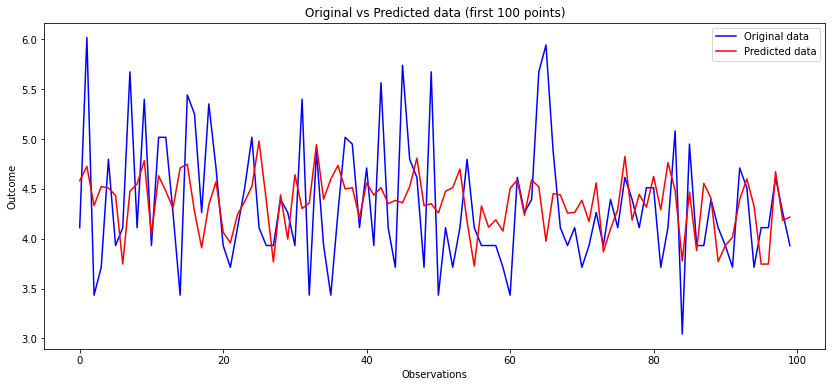

In [108]:
# Define el número de datos que deseas visualizar
N = 100

# Crear una figura
plt.figure(figsize=(14, 6))

# Trazar los datos de prueba originales
plt.plot(y_test.values[:N], label='Original data', color='blue')

# Trazar las predicciones
plt.plot(y_pred_best_lstm[:N], label='Predicted data', color='red')

# Añadir una leyenda
plt.legend()

# Añadir títulos y etiquetas
plt.title('Original vs Predicted data (first {} points)'.format(N))
plt.xlabel('Observations')
plt.ylabel('Outcome')

# Mostrar la gráfica
plt.show()

# 📊 Resultados

En esta sección aborderamos los diferentes resultados arrojados por los modelos de árboles de decisión, random forest, MLP y LSTM

Comenzamos mostrando las tablas de los resultados con las métricas de   
- Error Absoluto Medio (MAE)
- Error Cuadrático Medio (MSE)
- Coeficiente de determinación R2

Mostramos los resultados de los 4 modelos sin el uso de GridSearchCV para evaluar sus métricas sin la mejora de los parámetros

In [109]:
# Crear un diccionario con las métricas de los modelos
data = {
    "Decision Tree": [mae_simple_dt, mse_simple_dt, r2_simple_dt],
    "Random Forest": [mae_simple_rf, mse_simple_rf, r2_simple_rf],
    "MLPRegressor": [mae_simple_mlp, mse_simple_mlp, r2_simple_mlp],
    "LSTM": [mae_simple_lstm, mse_simple_lstm, r2_simple_lstm]
}

# Crear el DataFrame
errors_results_df = pd.DataFrame(data, index=['MAE', 'MSE', 'R2'])

# Mostrar el DataFrame
errors_results_df

Decision Tree  Random Forest  MLPRegressor      LSTM
MAE   1.459716e-05       0.000046      0.020752  0.014807
MSE   1.775822e-07       0.000001      0.000761  0.000598
R2    9.999996e-01       0.999997      0.998174  0.998563

Ahora, mostramos Mostramos los resultados de los 4 modelos con el uso de GridSearchCV para evaluar sus métricas con la mejora de los parámetros

In [110]:
# Crear un diccionario con las métricas de los modelos
data = {
    "Decision Tree": [mae_best_dt, mse_best_dt, r2_best_dt],
    "Random Forest": [mae_best_rf, mse_best_rf, r2_best_rf],
    "MLPRegressor": [mae_best_mlp, mse_best_mlp, r2_best_mlp],
    "LSTM": [mae_best_lstm, mse_best_lstm,r2_best_lstm]
}

# Crear el DataFrame
best_results_df = pd.DataFrame(data, index=['MAE', 'MSE', 'R2'])

# Mostrar el DataFrame
best_results_df

Decision Tree  Random Forest  MLPRegressor      LSTM
MAE   2.233297e-05       0.000060      0.004735  0.429446
MSE   4.089228e-07       0.000002      0.000031  0.353375
R2    9.999990e-01       0.999995      0.999924  0.151705

Creamos esta función para evaluar la curva de aprendiazaje de los distintos algoritmos, retornando una plot que muestra dicha curva según sea el modelo

In [111]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Número de ejemplos de entrenamiento")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score de validación cruzada")

    plt.legend(loc="best")
    return plt

In [112]:
# Combine X_train and Y_train into a single dataset
train_data = pd.concat([X_train, y_train], axis=1)

**Curva de Aprendizaje - Árboles de Decisión**

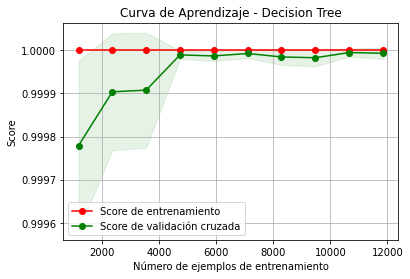

In [113]:
# DecisionTreeRegressor
title = "Curva de Aprendizaje - Decision Tree"
estimator_dt = DecisionTreeRegressor()
plot_learning_curve(estimator_dt, title, train_data[selected_features], train_data[target_vars.columns], cv=5)
plt.show()

Esto indica que el modelo es adecuado y ha aprendido bien de los datos de entrenamiento y puede generalizar bien a los datos no visto

**Curva de Aprendizaje - Random Forest**

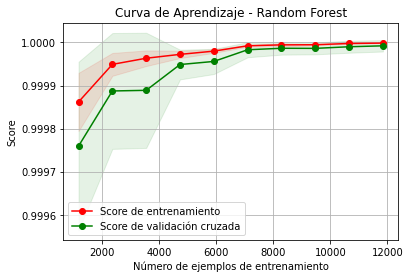

In [114]:
title = "Curva de Aprendizaje - Random Forest"
estimator_rf = RandomForestRegressor()
plot_learning_curve(estimator_rf, title, train_data[selected_features], train_data[target_vars.columns], cv=5)
plt.show()

**Curva de Aprendizaje - Red Neuronal**

Esto indica que el modelo es adecuado y ha aprendido bien de los datos de entrenamiento y puede generalizar bien a los datos no visto

<module 'matplotlib.pyplot' from '/Users/derekcantillo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

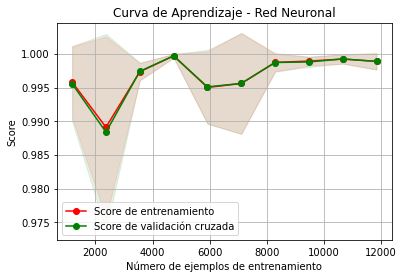

In [115]:
# Red neuronal
title = "Curva de Aprendizaje - Red Neuronal"
estimator_nn = MLPRegressor()
plot_learning_curve(estimator_nn, title, train_data[selected_features], train_data[target_vars.columns], cv=5)

El modelo presenta un ajuste optimo, demostrando un claro aprendizaje.

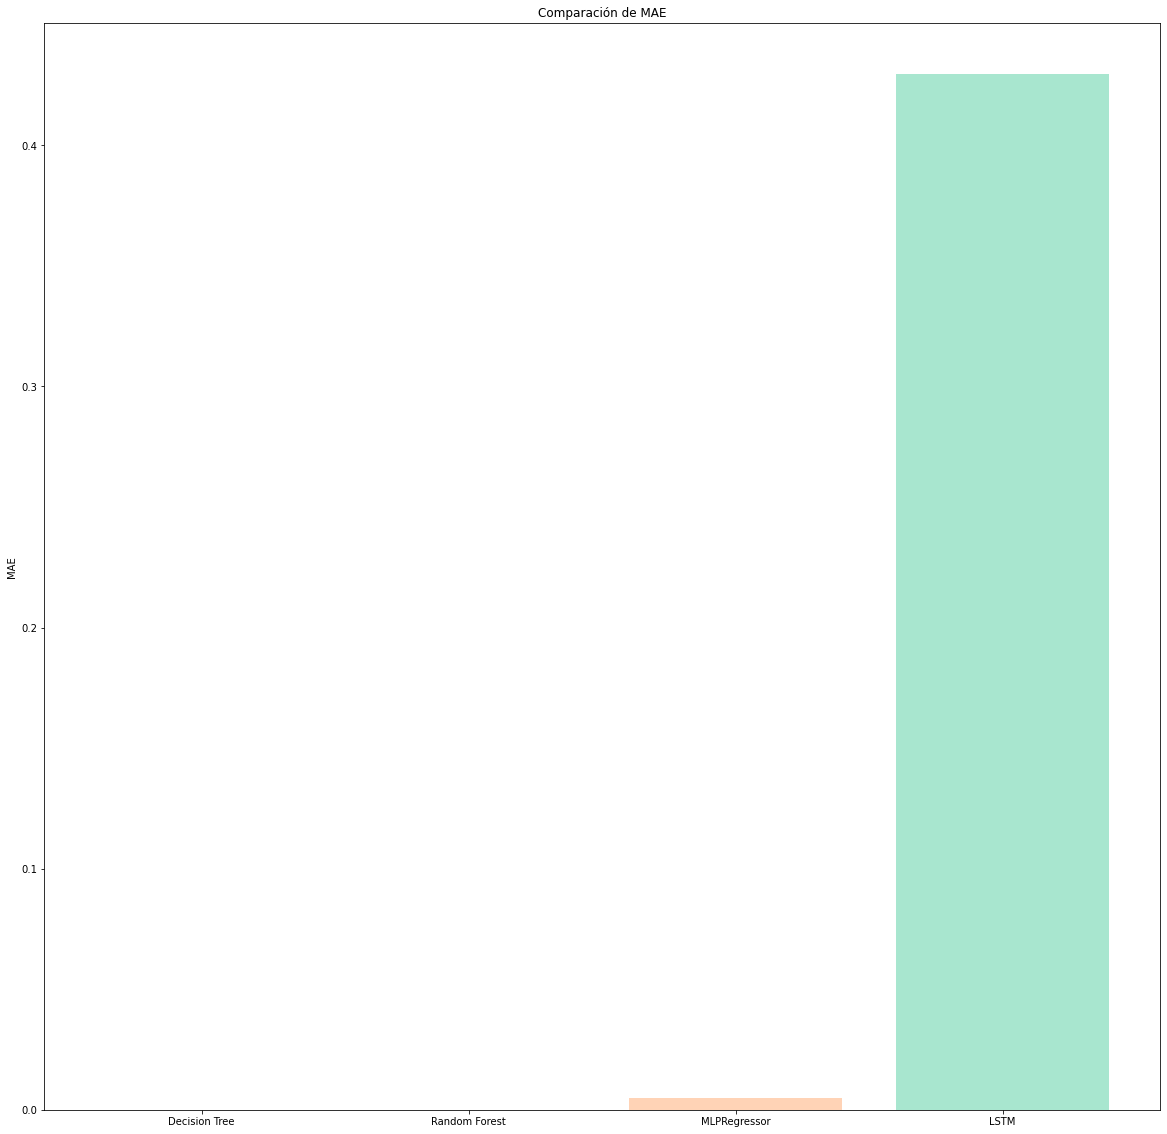

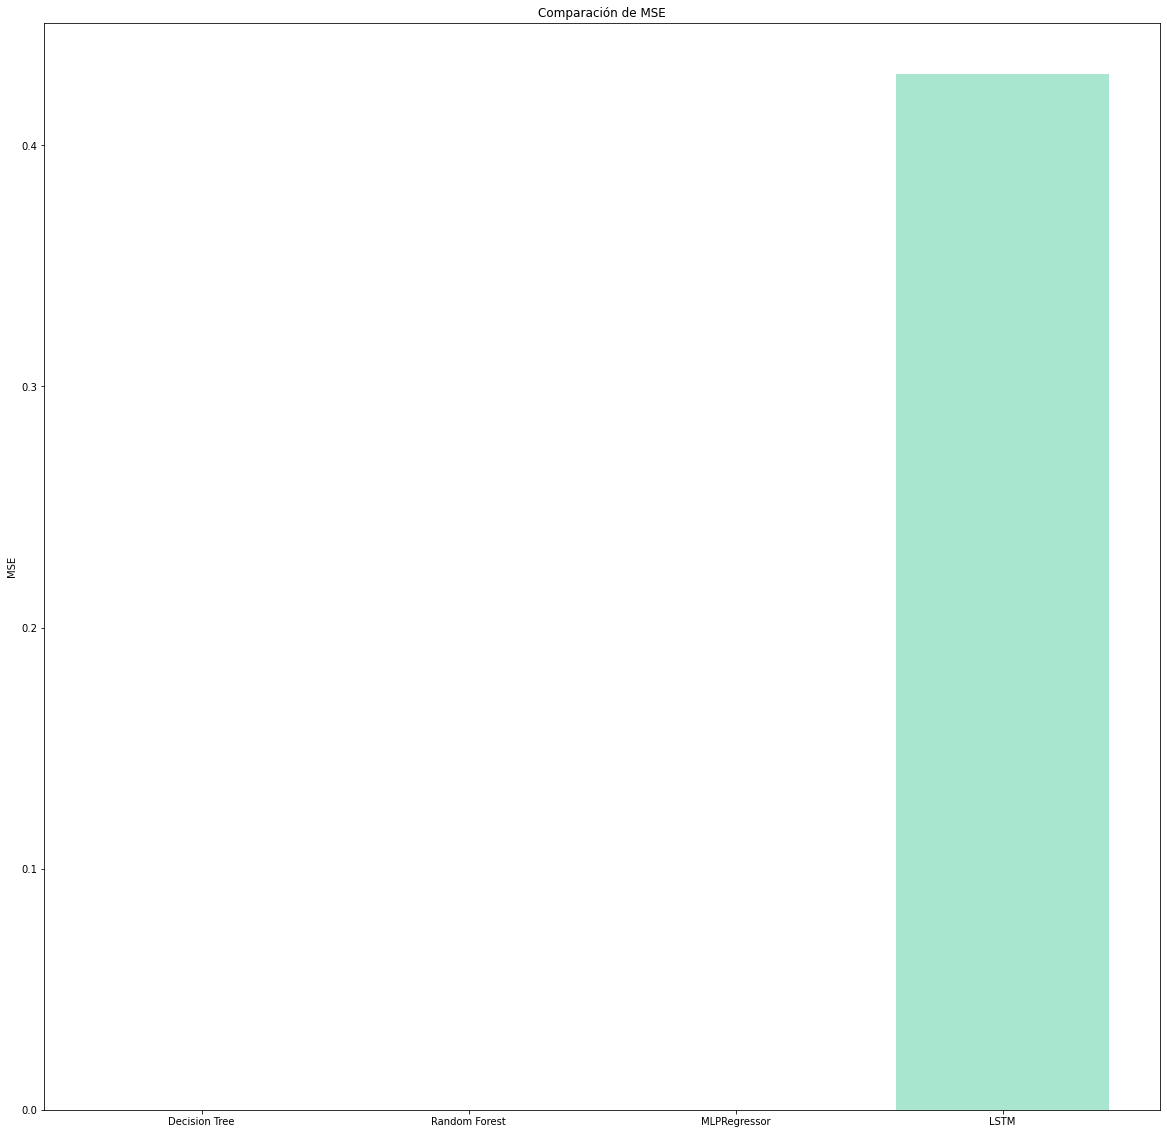

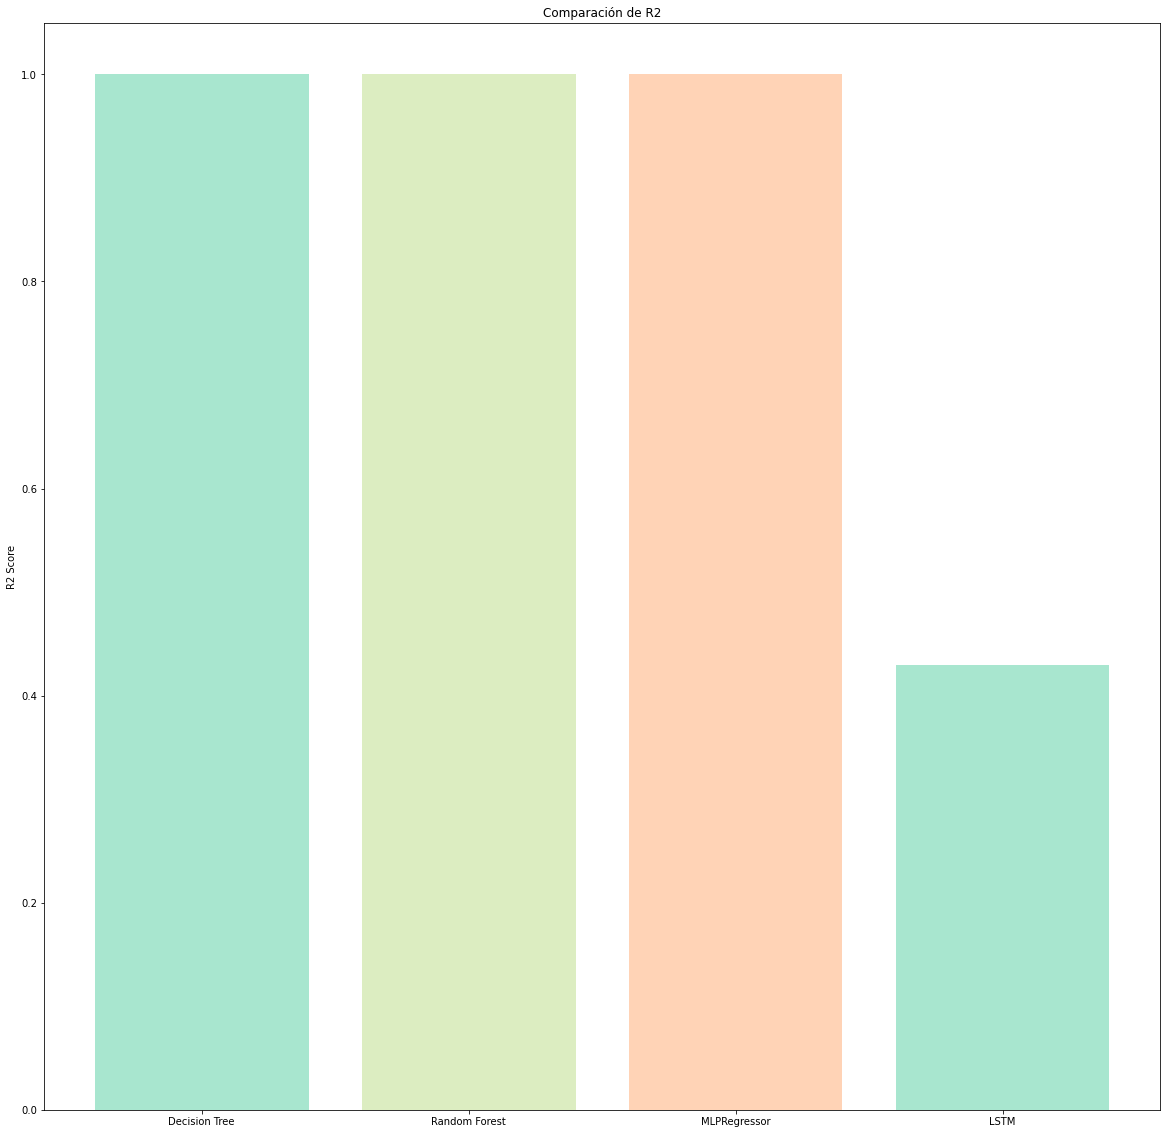

In [117]:
mae_values = [mae_best_dt, mae_best_rf, mae_best_mlp, mae_best_lstm]
mse_values = [mse_best_dt, mse_best_rf, mse_best_mlp, mae_best_lstm]
r2_values = [r2_best_dt, r2_best_rf, r2_best_mlp, mae_best_lstm]

models = ['Decision Tree', 'Random Forest', 'MLPRegressor', "LSTM"]
colors = ['#a8e6cf', '#dcedc1', '#ffd3b6']  # Define un color pastel para cada modelo

# Gráfica para MAE
plt.figure(figsize=(20,20))
plt.bar(models, mae_values, color=colors)
plt.title('Comparación de MAE')
plt.ylabel('MAE')
plt.show()

# Gráfica para MSE
plt.figure(figsize=(20,20))
plt.bar(models, mse_values, color=colors)
plt.title('Comparación de MSE')
plt.ylabel('MSE')
plt.show()

# Gráfica para R2
plt.figure(figsize=(20,20))
plt.bar(models, r2_values, color=colors)
plt.title('Comparación de R2')
plt.ylabel('R2 Score')
plt.show()

Se compararon los indices de error que presentaron los 4 modelos propuestos y se realizaron gráficas dependiendo del tipo de error que se manejará. Para el de la medida de error medio absoluto (MAE), los modelos de de decision tree y random forest obtuvieron un marjen de error bajo. Para el error cuadratico medio (MSE), se presenta un margen de error bastantante bajo en los modelos anteriores junto con el MLPregressor, viendo que el modelo LSTM presenta un valor mas alto.
Sin embargo, para el coeficiente R2 todos los modelos presentan valores significativos, donde LSTM tiene una diferencia considerable en comparación al resto al presentar un valor menor.

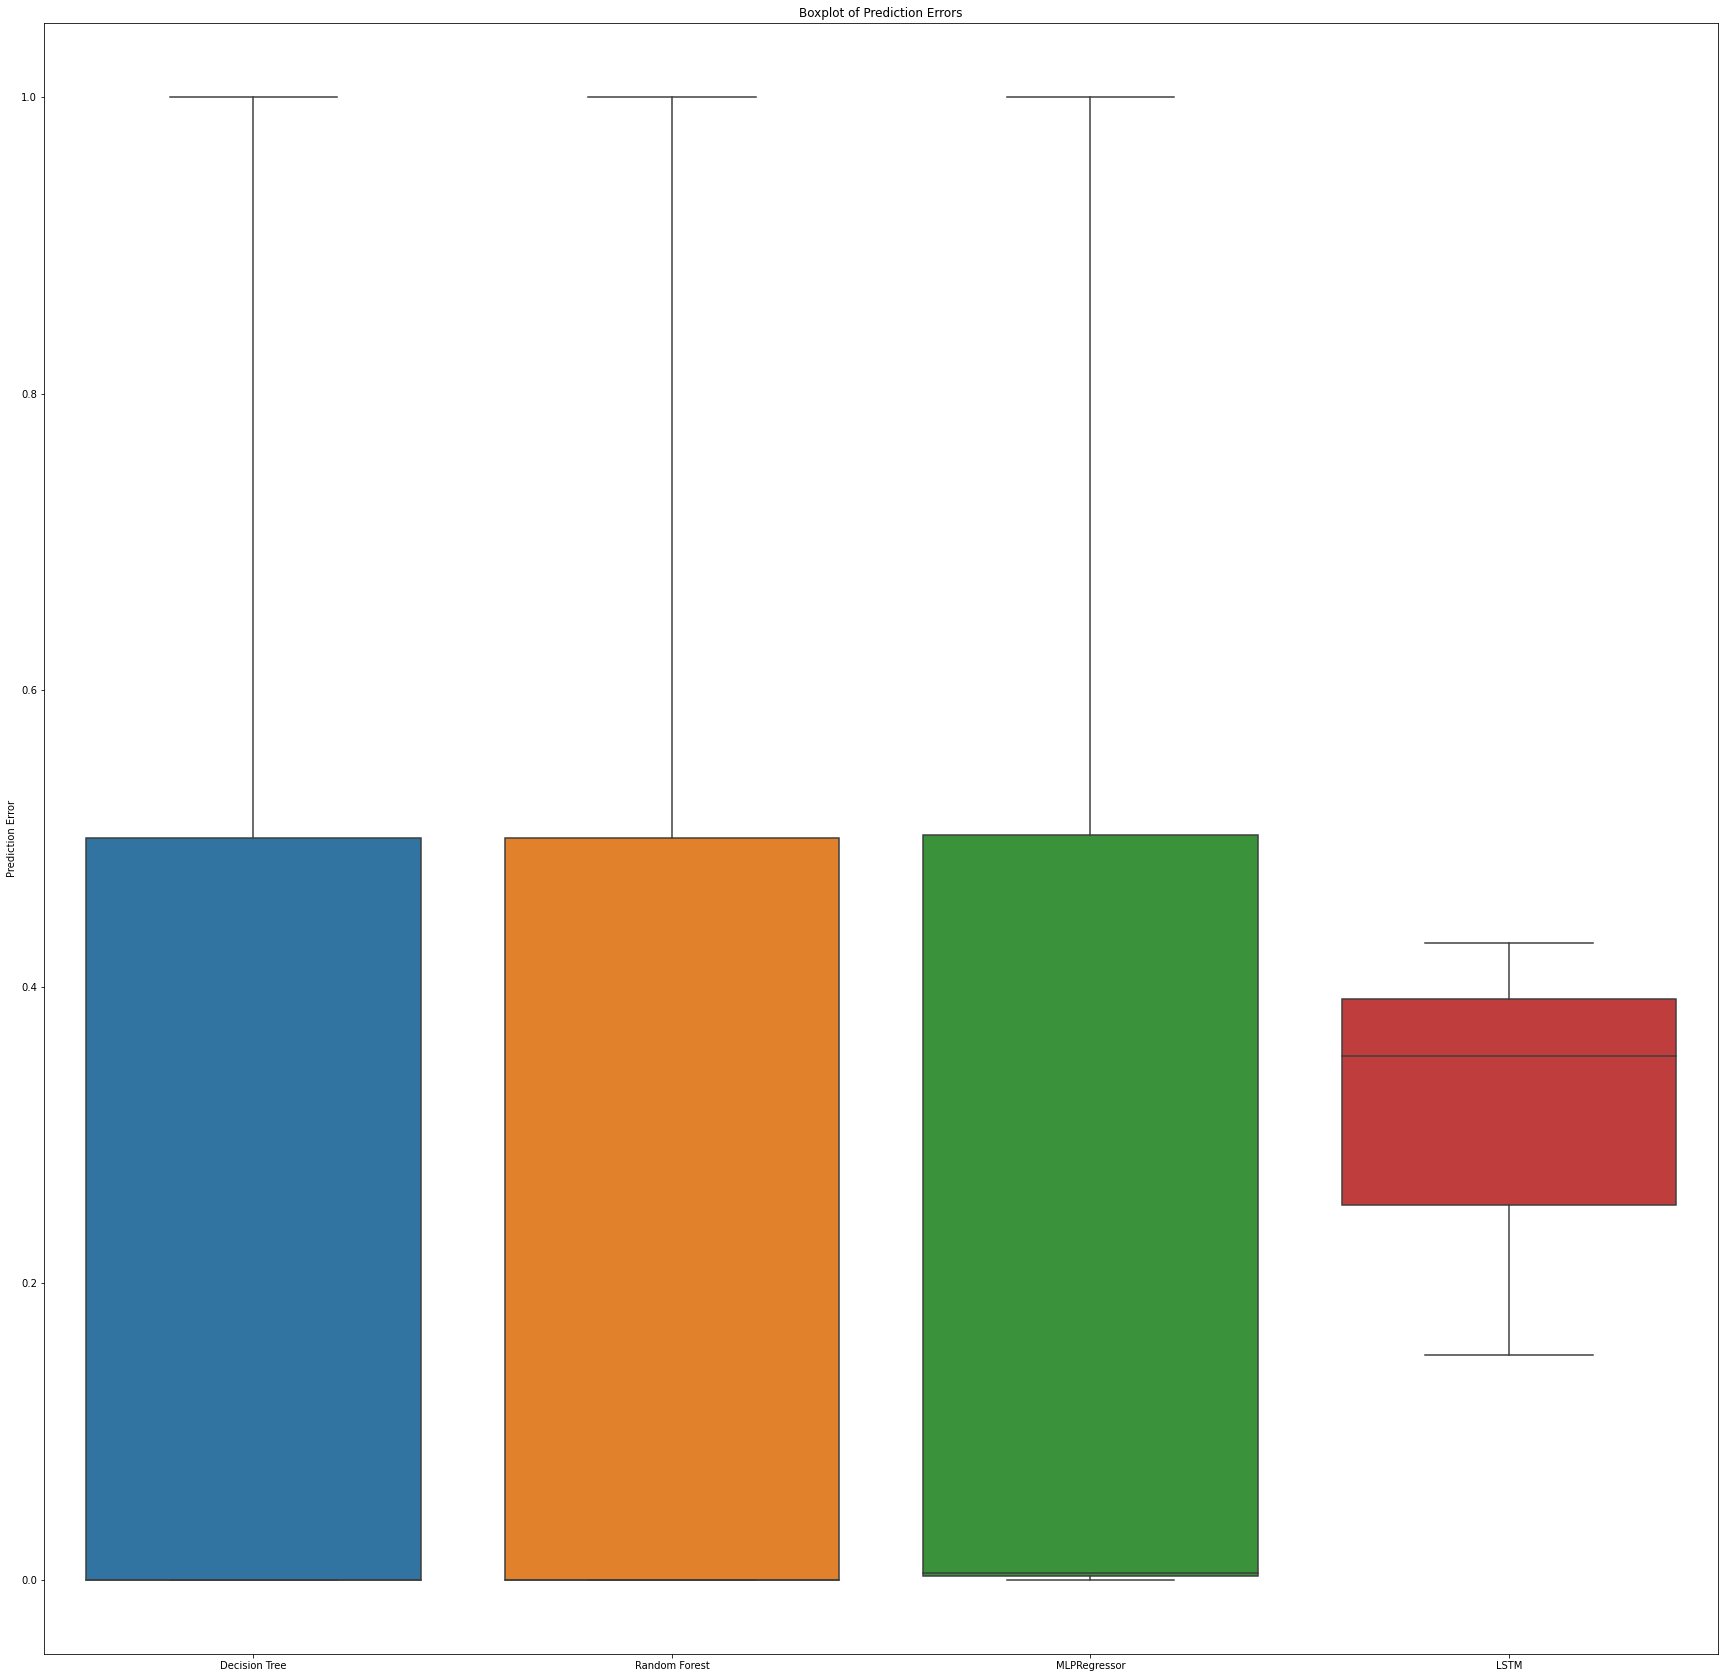

In [118]:

errors_dt = mae_best_dt, mse_best_dt, r2_best_dt
errors_rf = mae_best_rf, mse_best_rf, r2_best_rf
errors_mlp = mae_best_mlp, mse_best_mlp, r2_best_mlp
errors_lstm = mae_best_lstm, mse_best_lstm, r2_best_lstm
errors = [errors_dt, errors_rf, errors_mlp, errors_lstm]
labels = ['Decision Tree', 'Random Forest', 'MLPRegressor', 'LSTM']

plt.figure(figsize=(30,30))
sns.boxplot(data=errors)
plt.xticks(range(len(labels)), labels)
plt.title('Boxplot of Prediction Errors')
plt.ylabel('Prediction Error')
plt.show()

Para estos diagramas de caja, el modelo LSTM no presenta muchos valores por encima de la media por lo que presenta una desviación menor.

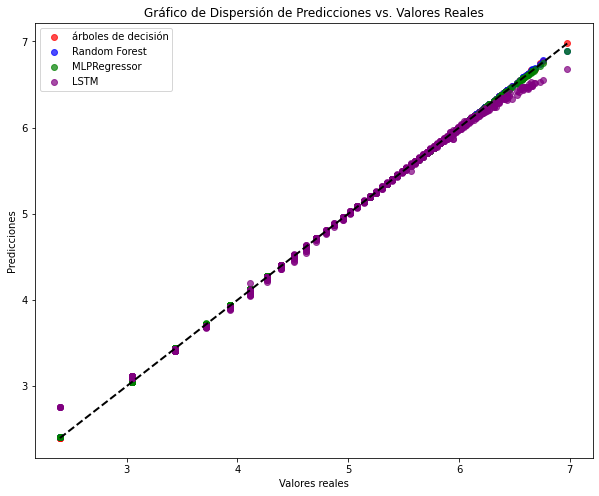

[CV] END max_depth=15, min_samples_split=2, n_estimators=300; total time=   4.5s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=15, min_samples_split=5, n_estimators=300; total time=   3.9s
[CV] END max_depth=15, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END max_depth=25, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=25, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=25, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=25, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=25, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END max_depth=25, min_samples_split=5, n_estimators=400; total time=   5.0s
[CV] END max_depth=25, min_samples_split=10, n_estimators=400; total time=   5.0s
[CV] END max_depth=35, min_samples_split=2, n_estimators=400; total time=   5.0s
[CV] END max_depth=35, min

[CV] END max_depth=15, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END max_depth=15, min_samples_split=2, n_estimators=400; total time=   4.9s
[CV] END max_depth=15, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_depth=15, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END max_depth=15, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END max_depth=25, min_samples_split=2, n_estimators=300; total time=   4.2s
[CV] END max_depth=25, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END max_depth=25, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END max_depth=25, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END max_depth=25, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV] END max_depth=35, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=35, min_samples_split=2, n_estimators=300; total time=   3.9s
[CV] END max_depth=35,

In [120]:
# Graficar scatter plot de predicciones vs. valores reales para los cuatro modelos juntos
plt.figure(figsize=(10, 8))

# Decision Tree
plt.scatter(y_test, y_pred_best, color='red', alpha=0.7, label='árboles de decisión')

# Random Forest
plt.scatter(y_test, pred_rf_best, color='blue', alpha=0.7, label='Random Forest')

# MLPRegressor
plt.scatter(y_test, y_pred_mlp_best, color='green', alpha=0.7, label='MLPRegressor')

# Deep Neural Network
plt.scatter(y_test, y_pred_lstm, color='purple', alpha=0.7, label='LSTM')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión de Predicciones vs. Valores Reales')
plt.legend()
plt.show()


## Inferencias
- Basandonos en el diagrama de dispersión, podemos afirmar que los modelos de arendizaje implementados tieden a acercarse bastante a los resultados esperados dado a que estos no se mantienen alejados de la linea de tendencia.

- En cuanto al uso del Grid search CV:

 - Error Absoluto Medio (MAE): Después de usar GridSearchCV, parece que el Decision Tree y el Random Forest siguen siendo los modelos que producen los errores más pequeños en sus predicciones en promedio, con el Decision Tree teniendo un pequeño incremento en su error y el Random Forest teniendo una ligera mejora. Por otro lado, MLPRegressor y LSTM tienen un aumento considerable en su error.

 - Error Cuadrático Medio (MSE): Al igual que con el MAE, el Decision Tree y el Random Forest siguen teniendo los errores cuadráticos medios más bajos después de aplicar GridSearchCV, con un pequeño incremento en ambos casos. Nuevamente, MLPRegressor y LSTM muestran un incremento significativo en su error.

 - Coeficiente de Determinación R2: Aquí es donde se observa el mayor cambio. Si bien Decision Tree y Random Forest mantienen valores altos, MLPRegressor muestra una pequeña disminución en su R2. No obstante, es LSTM el que muestra la mayor disminución, llegando a un valor muy bajo de R2.

- Y cuando no se usa el Grid search CV:

 - Error Absoluto Medio (MAE): Este error representa la magnitud media de los errores en un conjunto de pronósticos, sin considerar su dirección. Es la medida de error más directa y fácil de entender, ya que simplemente promedia las diferencias absolutas. En este caso, el Decision Tree tiene el MAE más bajo, lo que sugiere que es el modelo que cometió los errores más pequeños en sus predicciones en promedio.

 - Error Cuadrático Medio (MSE): Esta medida penaliza más los errores grandes que el MAE. Nuevamente, el Decision Tree muestra el MSE más bajo, lo que indica que este modelo tuvo menos errores grandes en sus predicciones en comparación con los otros modelos.

 - Coeficiente de Determinación R2: Este coeficiente indica qué porcentaje de la variación total de la variable dependiente (la que estamos intentando predecir) se puede explicar por la variación en las variables independientes (las que estamos utilizando para hacer las predicciones). Nuevamente, el Decision Tree tiene el valor más alto (prácticamente 1), lo que sugiere que este modelo fue capaz de explicar casi toda la variación en los datos.

# 💡Conclusiones

En este trabajo, comenzamos con una clara definición del problema y una descripción detallada de las variables involucradas. La inspección y la visualización de los datos son pasos esenciales para entender las características y estructuras subyacentes de los datos, y es excelente ver que se han llevado a cabo estos pasos.

La eliminación de las columnas no informativas y la transformación logarítmica son técnicas de preprocesamiento valiosas que pueden ayudar a mejorar la interpretabilidad y el rendimiento del modelo, respectivamente. Nuestra elección de centrarse en 'Appliances_energy' como variable objetivo está bien fundamentada, y es un paso importante en la definición de la tarea de modelado.

La selección de características a través de la correlación y el escalado de los datos con RobustScaler es importante porque pueden tener un impacto significativo en el rendimiento de nuestros modelos.

En cuanto a la implementación de los modelos, hemos elegido un conjunto diverso de algoritmos, que van desde los modelos basados en árboles hasta los modelos basados en redes neuronales. Esto te permite explorar una amplia gama de posibilidades y encontrar el modelo que mejor se adapte a tus datos.

Los resultados que hemos obtenido son bastante buenos aparentemente. Aunque los modelos basados en árboles parecen funcionar mejor en nuestro conjunto de datos, todos los modelos presentan un rendimiento bastante alto, lo que indica que los modelos pueden estar bien ajustados.

La visualización de nuestros resultados a través de gráficos de barras, diagramas de caja y bigotes, tablas y diagramas de dispersión es un excelente medio para interpretar y comunicar tus hallazgos.

Basándonos en los resultados presentados, es posible observar un alto grado de eficacia en los modelos que se han implementado. Los valores de MAE y MSE son particularmente bajos en todos los casos, lo que sugiere que los modelos son capaces de hacer predicciones bastante precisas con respecto a la variable objetivo 'Appliances_energy'.

El coeficiente de determinación (R^2) en todos los modelos es extremadamente alto, estando muy cerca del valor perfecto de 1. Esto indica que los modelos son capaces de explicar casi completamente la variabilidad de la variable objetivo basándose en las características independientes seleccionadas.

Es notable el hecho de que el Decision Tree y el Random Forest tienen un rendimiento sobresaliente, con los valores más bajos de MAE y MSE, y los valores más altos de R^2. Esto podría indicar que los datos presentan una estructura que se presta bien a estos modelos basados en árboles.

Por otro lado, el rendimiento del MLPRegressor y del LSTM, aunque ligeramente inferior en comparación con los modelos basados en árboles, sigue siendo bastante alto, lo que indica que estos modelos también son capaces de capturar la estructura subyacente de los datos.

En general, estos resultados indican que se ha hecho un excelente trabajo en la selección y ajuste de los modelos, así como en la preparación previa de los datos. Es evidente que cada uno de estos modelos ha aportado una perspectiva única y valiosa en la predicción del consumo de energía de los electrodomésticos.